# Customer Segmentation Using Unsupervised Clustering on Grocery Firm Data
In this project, I applied unsupervised clustering techniques to analyze customer records from a grocery firm's database. The goal was to perform customer segmentation, which involves grouping customers based on shared characteristics and behaviors. By identifying these segments, the business can tailor its products and services to better meet the unique needs of each group, enhancing customer satisfaction and optimizing business strategies. This analysis provides actionable insights to improve customer engagement and address the specific concerns of different customer types."

## IMPORTING LIBRARIES

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

## LOADING DATA



In [ ]:
data = pd.read_csv("marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


For more information on the attributes:
### People

**ID**: Customer's unique identifier

**Year_Birth**: Customer's birth year

**Education**: Customer's education level

**Marital_Status**: Customer's marital status

**Income**: Customer's yearly household income

**Kidhome**: Number of children in customer's household

**Teenhome**: Number of teenagers in customer's household

**Dt_Customer**: Date of customer's enrollment with the company

**Recency**: Number of days since customer's last purchase

**Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

### Products

**MntWines**: Amount spent on wine in last 2 years

**MntFruits**: Amount spent on fruits in last 2 years

**MntMeatProducts**: Amount spent on meat in last 2 years

**MntFishProducts**: Amount spent on fish in last 2 years

**MntSweetProducts**: Amount spent on sweets in last 2 years

**MntGoldProds**: Amount spent on gold in last 2 years

### Promotion

**NumDealsPurchases**: Number of purchases made with a discount

**AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

**AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

**AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

**AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

**AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

**Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

**NumWebPurchases**: Number of purchases made through the company’s website

**NumCatalogPurchases**: Number of purchases made using a catalogue

**NumStorePurchases**: Number of purchases made directly in stores

**NumWebVisitsMonth**: Number of visits to company’s website in the last month

## DATA CLEANING

In this section

- Data Cleaning

- Feature Engineering


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From the above output, we observe that:

- There are missing values in income
- Dt_Customer  is not parsed as DateTime
- There are some categorical features in our data frame; as there are some features in dtype: object. So we will need to encode them into numeric forms later.

First of all, for the missing values, we are going to drop the rows that have missing income values.

In [ ]:
data = data.dropna()

In [ ]:
# parse dt_customer ad datetime
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"],format = "%d-%m-%Y")

Let create a new feature **Customer_for** of the numbers of days customers started to shop in the store relative to newest customer

In [ ]:
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

#### Categorical features

In [ ]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


#### New features
I will engineer new features to enhance the dataset and provide deeper insights:

- **Age**: Extract the customer's age based on their date of birth.
- **Spent**: Create a feature representing the total amount spent by the customer across various categories over the last two years.
- **Living_With**: Derive this feature from "Marital_Status" to capture the living situation of couples.
- **Children**: Generate a feature indicating the total number of children in the household, including both kids and teenagers.
- **Family_Size**: Create a new feature to indicate the overall size of the household, considering all family members.
- **Is_Parent**: Add a feature to indicate the parenthood status of each customer.
- **Education**: Simplify the "Education" feature by categorizing it into three distinct groups based on its value counts.
- Drop any redundant features that no longer add value after these transformations.

In [ ]:
#Feature Engineering
#Age of customer today
data["Age"] = 2024-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [ ]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,57283200000000000,67,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,9763200000000000,70,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,26956800000000000,59,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,12009600000000000,40,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,13910400000000000,43,422,Partner,1,3,1


#### data exploration

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

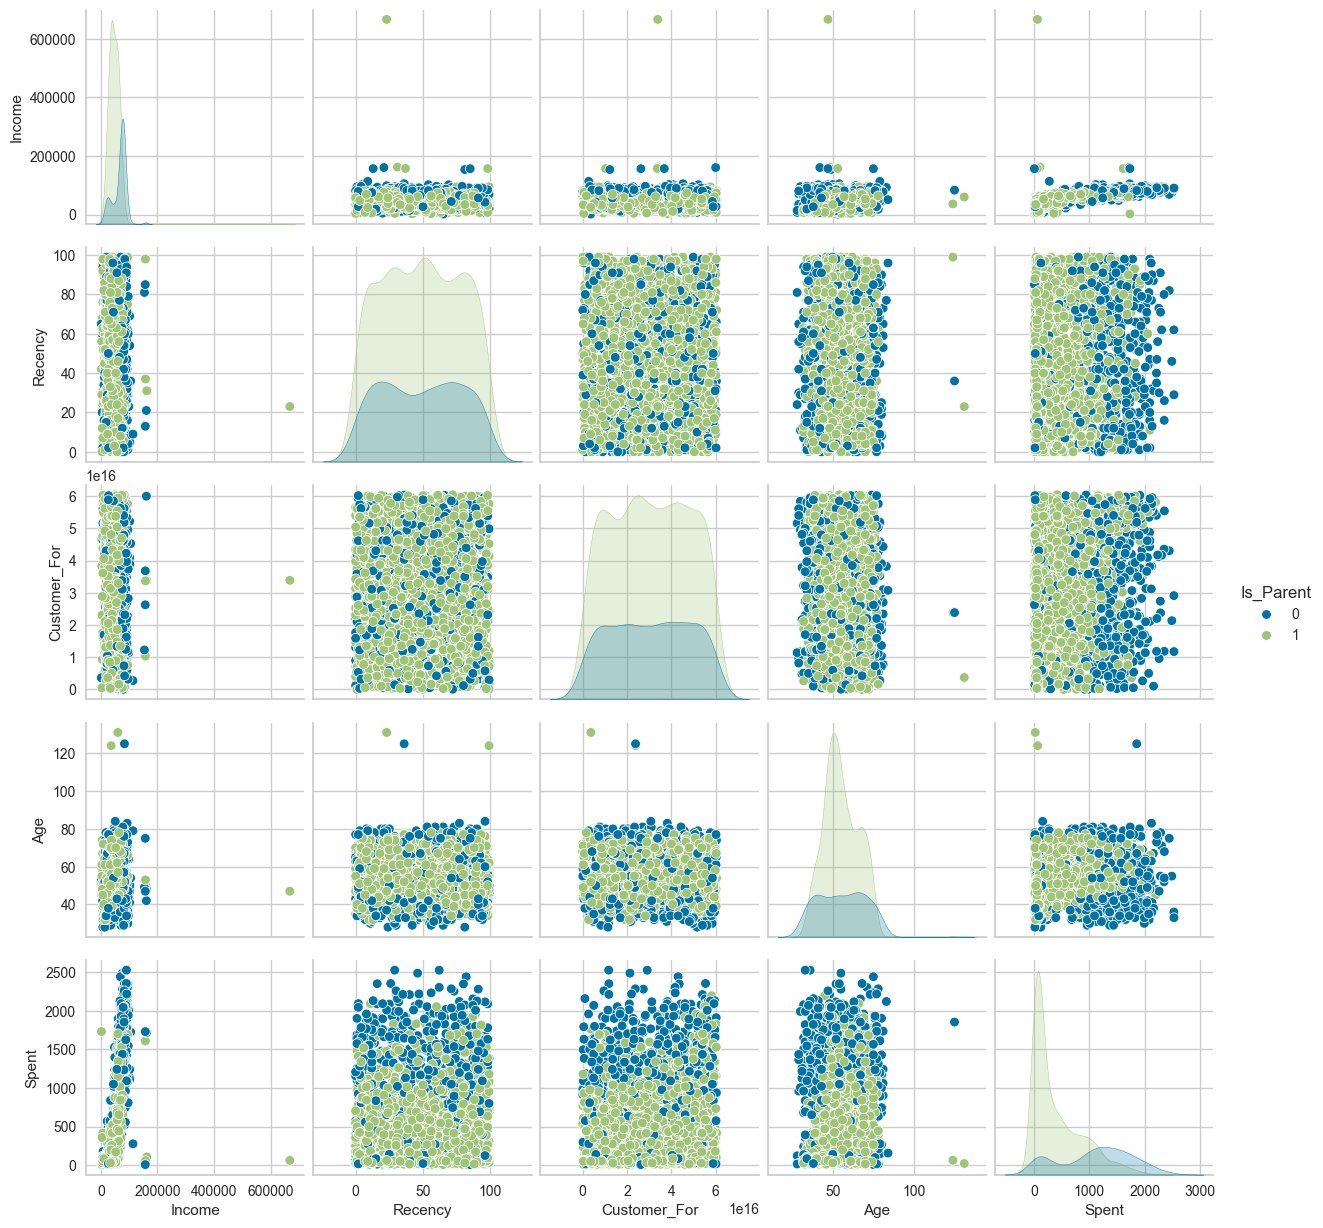

In [ ]:

#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent")
#Taking hue
plt.show()

Clearly, there are a few outliers in the Income and Age features. I will be deleting the outliers in the data.

In [ ]:
#Dropping the outliers by setting a cap on Age and income.
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


<Axes: >

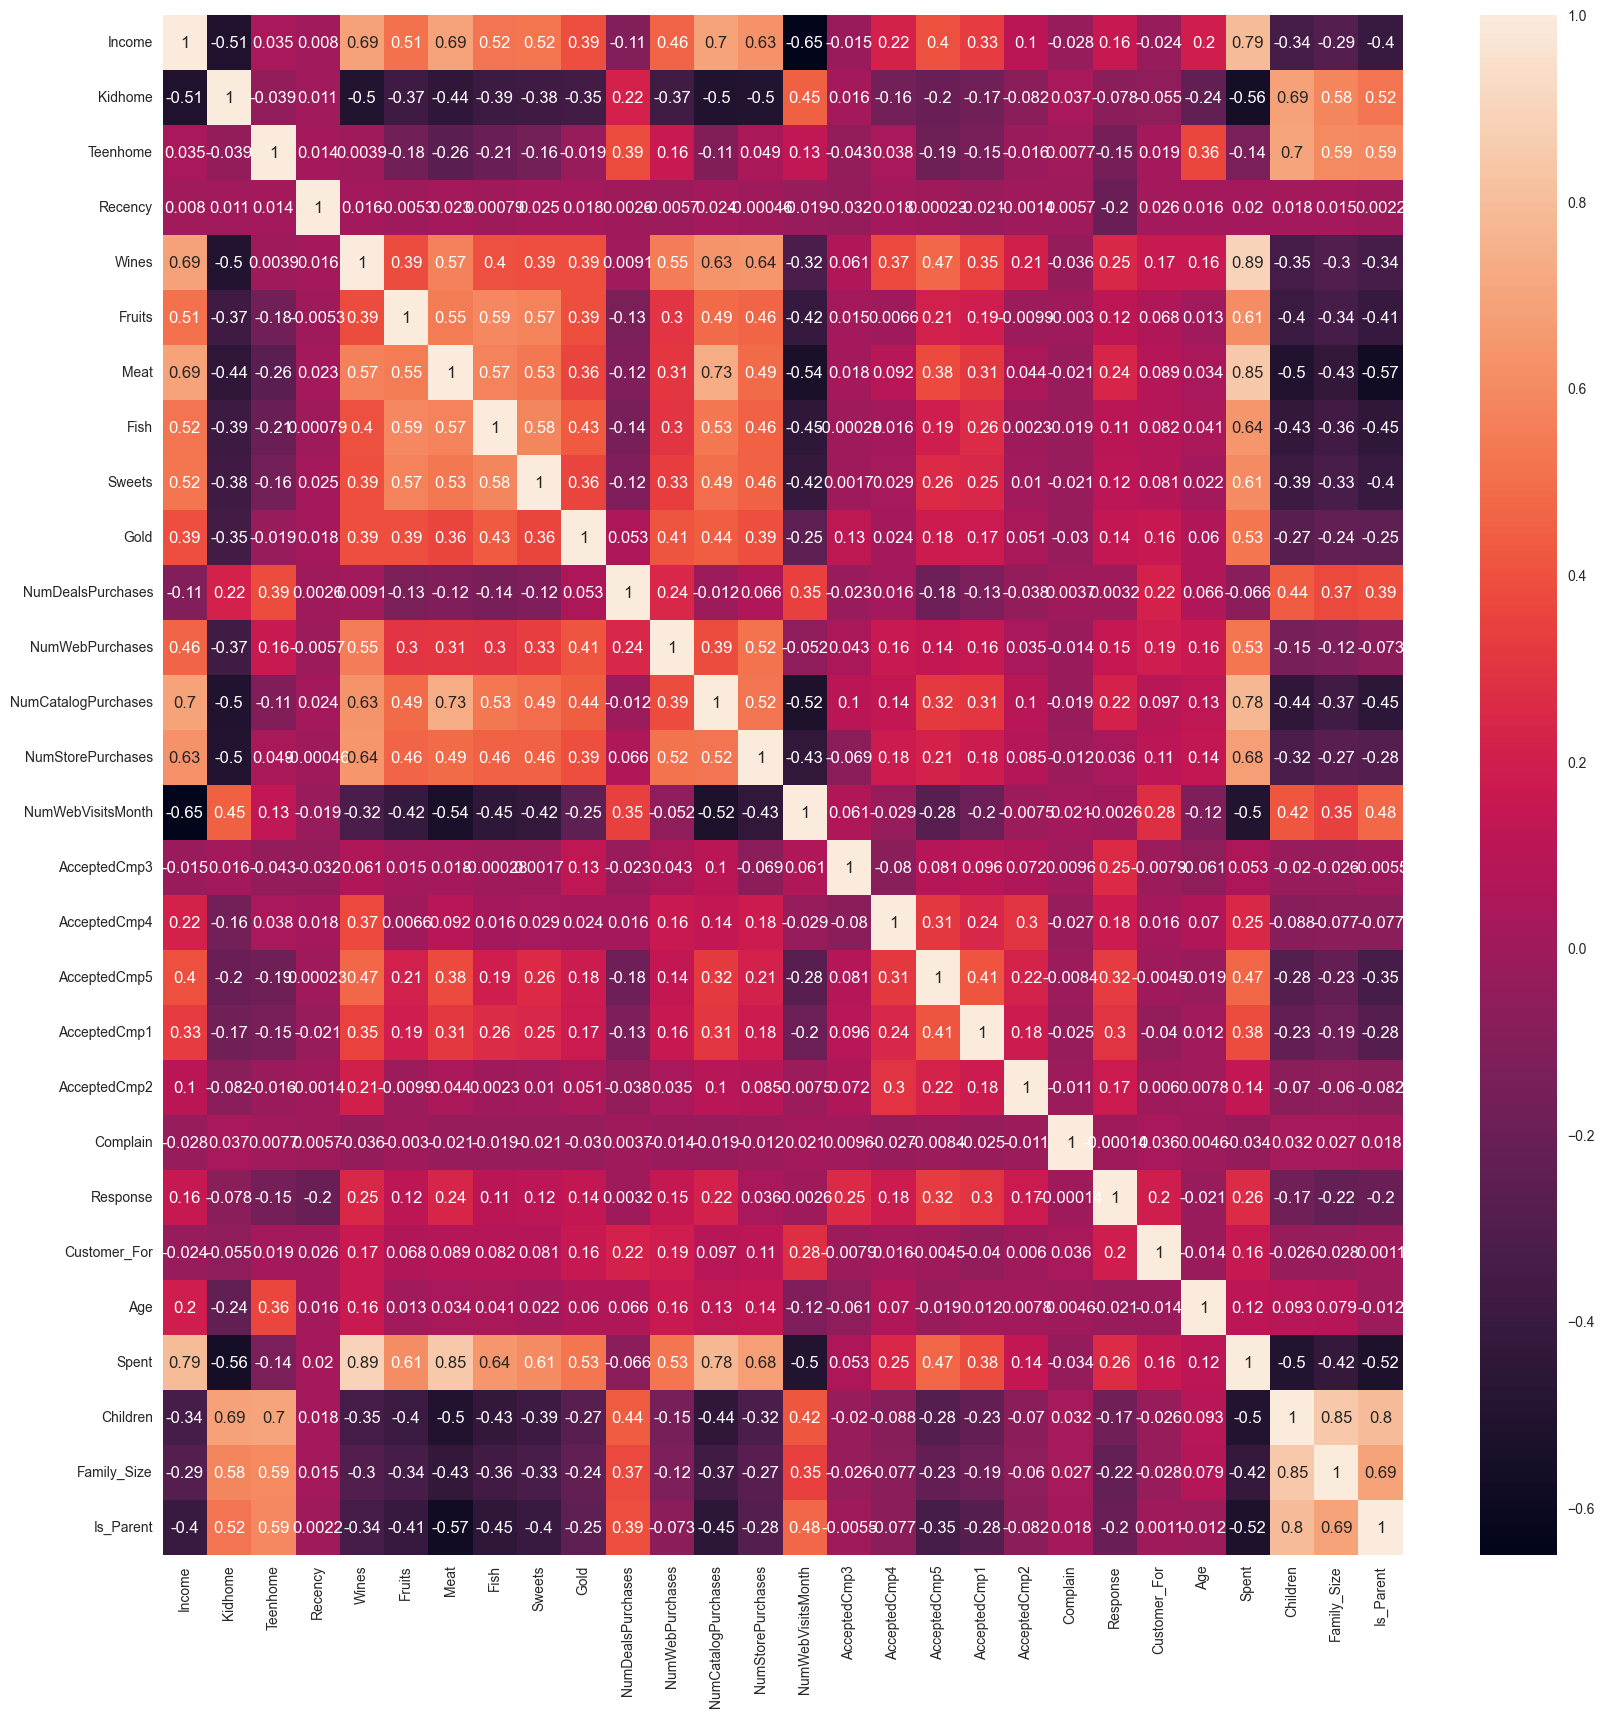

In [ ]:
#correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
corrmat= numeric_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True)

## DATA PREPROCESSING



**Data Preprocessing for Clustering**

In this section, I will preprocess the data to prepare it for clustering. The following steps are applied:

1. **Label Encoding**: Convert categorical features into numerical values using label encoding.
2. **Feature Scaling**: Standardize the numerical features using a standard scaler to ensure they are on the same scale.
3. **Dimensionality Reduction**: Create a subset of the data for dimensionality reduction to simplify the clustering process.



In [ ]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [ ]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [ ]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to model:")
scaled_ds.head()

Dataframe to model:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


## DIMENSIONALITY REDUCTION

**Dimensionality Reduction with PCA for Classification**

In this problem, the dataset contains many features, and while more features provide more information, they also make the model harder to work with due to redundancy and correlation. To address this, I will apply dimensionality reduction to selected features before feeding them into the classifier.

Dimensionality reduction simplifies the dataset by reducing the number of features, focusing only on the most important variables while minimizing information loss. This process enhances the interpretability of the data.

For this project, I will use **Principal Component Analysis (PCA)**, a widely used technique for reducing dimensionality. PCA transforms the original features into a set of uncorrelated principal components that explain the maximum variance in the data.

### Steps in this section:
1. Perform dimensionality reduction using PCA.
2. Visualize the reduced dataset.
3. Reduce the dataset dimensions to 3 components for further analysis.

By reducing the dimensions to three, we aim to retain the most meaningful information from the data while optimizing its interpretability for classification.


In [ ]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,2.569775e-17,2.878602,-5.978124,-2.539470,-0.781595,2.386380,7.452915
col2,2212.0,5.139550e-17,1.709469,-4.194757,-1.323929,-0.173721,1.234851,6.168189
col3,2212.0,-1.606109e-17,1.231687,-3.625248,-0.853713,-0.050842,0.863974,6.750458


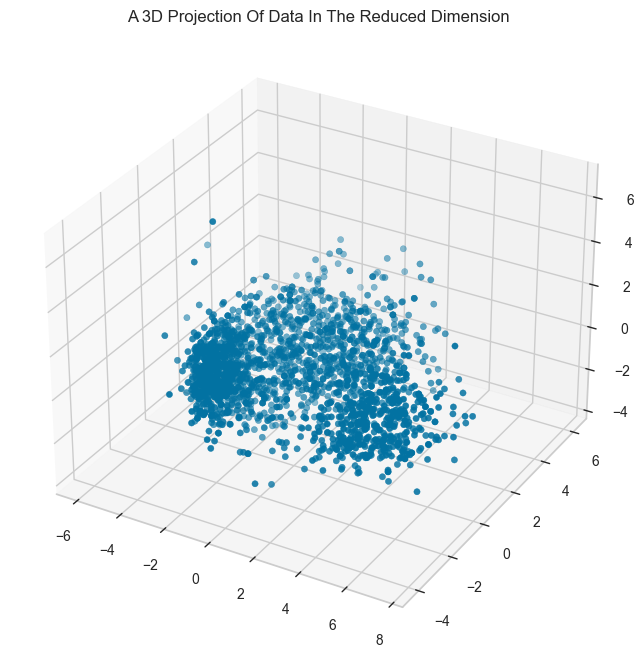

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## CLUSTERING

Performing clustering via Agglomerative clustering.

Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

Steps involved in the Clustering

- Elbow Method to determine the number of clusters to be formed
- Clustering via Agglomerative Clustering
- Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


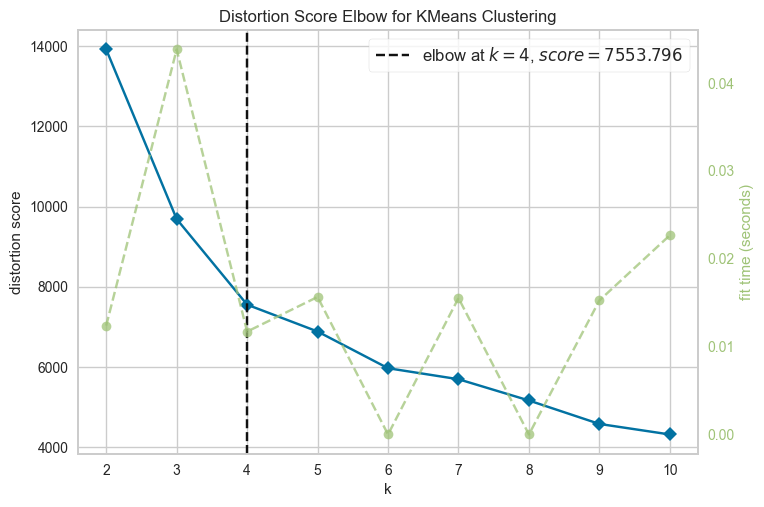

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

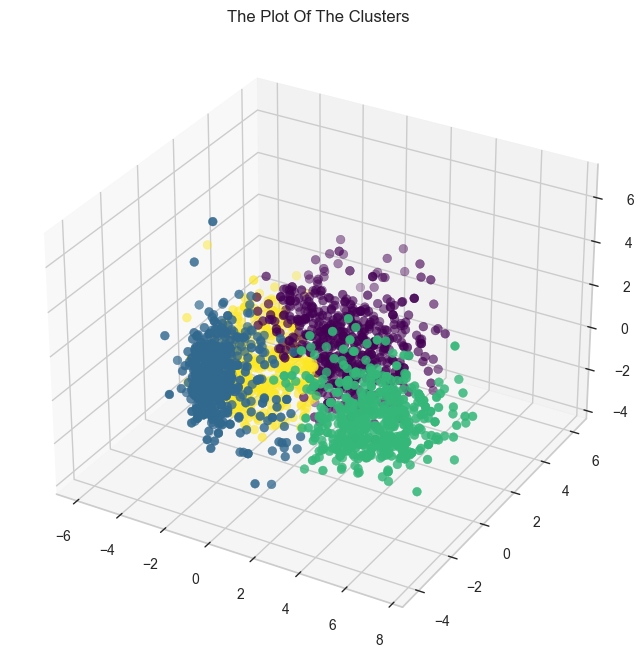

In [ ]:
from matplotlib import cm

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"],cmap=cm.viridis)
ax.set_title("The Plot Of The Clusters")
plt.show()

## EVALUATING MODELS




Here’s a reformulated version of your description:

Cluster Analysis Through Exploratory Data Analysis (EDA)

Since this is an unsupervised clustering problem, there is no labeled feature to directly evaluate or score the model. Instead, the goal is to study the patterns within the formed clusters and interpret their characteristics.

In this section, I will analyze the clusters through Exploratory Data Analysis (EDA) to uncover meaningful insights about the data and the nature of the clusters.

We will start by examining the distribution of the groups formed by the clustering algorithm to gain a better understanding of how the data is segmented.

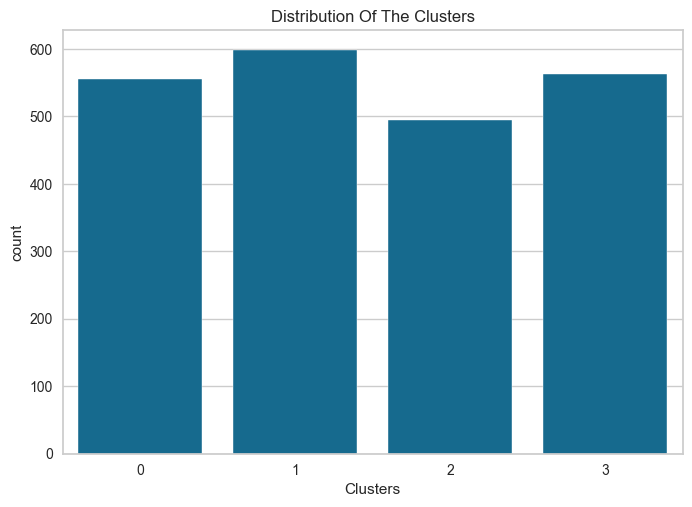

In [ ]:
pl = sns.countplot(x=data["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

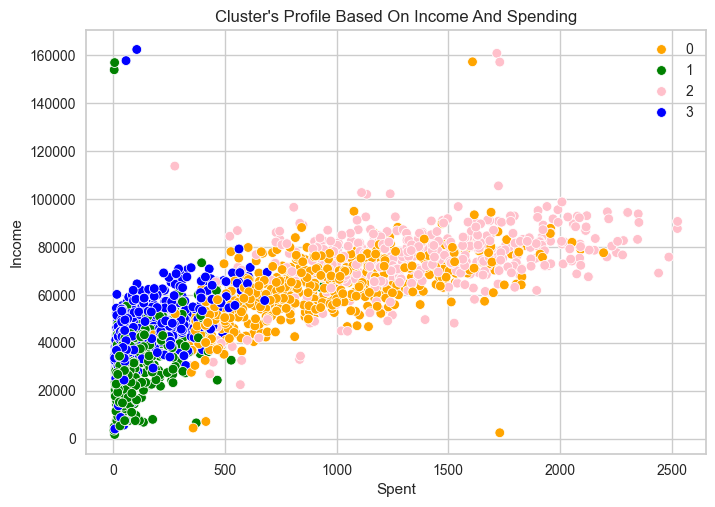

In [ ]:
# Define custom color palette
custom_palette = ['orange', 'green', 'pink', 'blue']

# Create the scatterplot with the custom palette
pl = sns.scatterplot(data=data,
                     x="Spent",
                     y="Income",
                     hue="Clusters",
                     palette=custom_palette)

pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()


**Income vs. Spending Plot Reveals Cluster Patterns**

The income vs. spending plot highlights distinct patterns across the clusters:

- **Group 0**: High spending with average income
- **Group 1**: Low spending with low income
- **Group 2**: High spending with high income
- **Group 3**: High spending with low income

Next, I will analyze the detailed distribution of these clusters based on spending across various product categories, including Wines, Fruits, Meat, Fish, Sweets, and Gold.



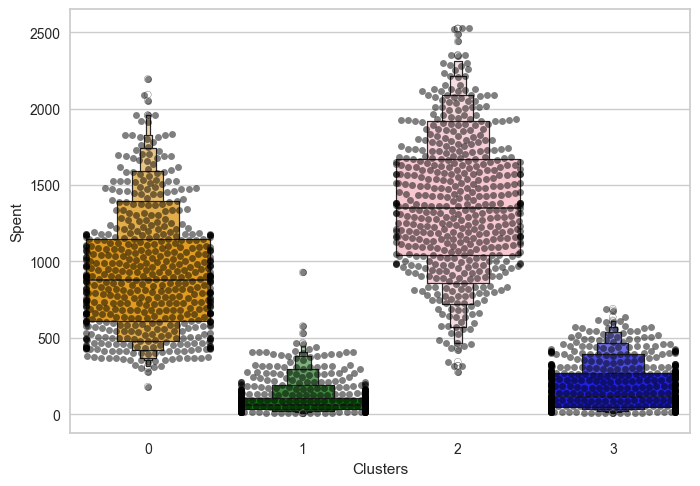

In [ ]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "black", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=custom_palette)
plt.show()

cluster 2 is our biggest set of customers closely followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies.

Let us next explore how did our campaigns do in the past.

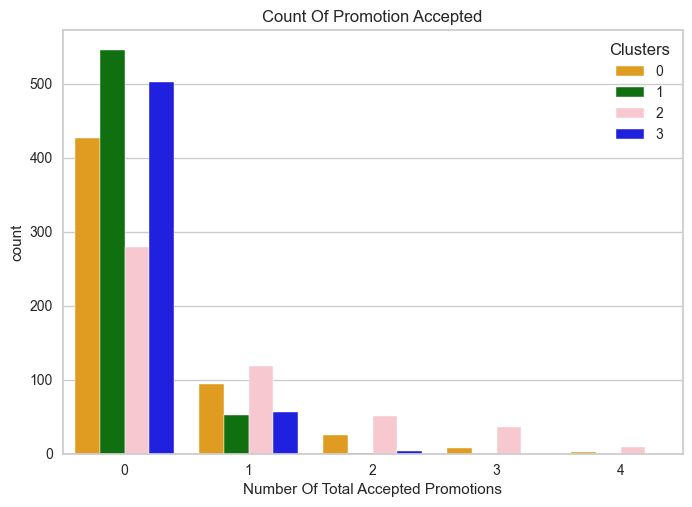

In [ ]:
#Creating a feature to get a sum of accepted promotions
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= custom_palette)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

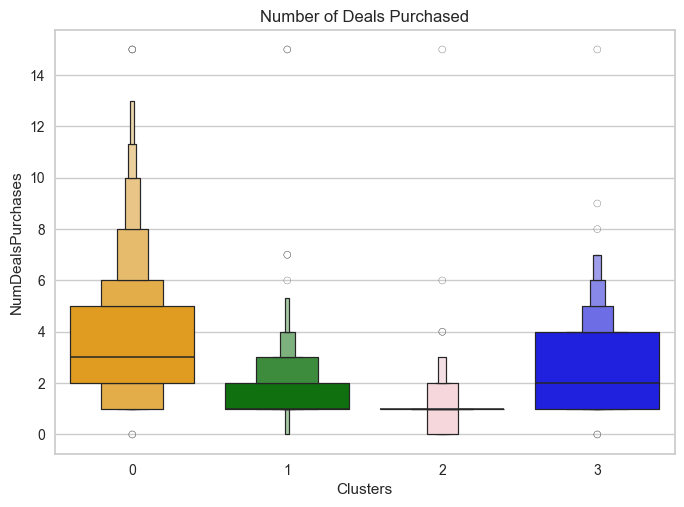

In [ ]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= custom_palette)
pl.set_title("Number of Deals Purchased")
plt.show()

Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 3. However, our star customers cluster 2 are not much into the deals. Nothing seems to attract cluster 1 overwhelmingly

## PROFILING



**Customer Profiling Based on Clusters**

After forming the clusters and analyzing their purchasing habits, the next step is to understand who the customers in each cluster are. By profiling the clusters, we can identify our star customers and determine which groups require more attention from the retail store’s marketing team.

To do this, I will analyze key customer attributes by plotting features that reflect personal traits in the context of their cluster. Based on these insights, I will draw conclusions about the characteristics of each cluster and determine which customers represent the most value for the business and which might need targeted marketing efforts.



<Figure size 800x550 with 0 Axes>

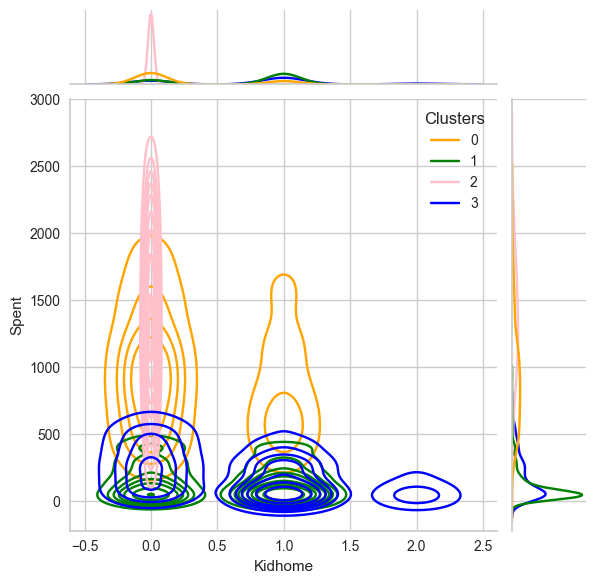

<Figure size 800x550 with 0 Axes>

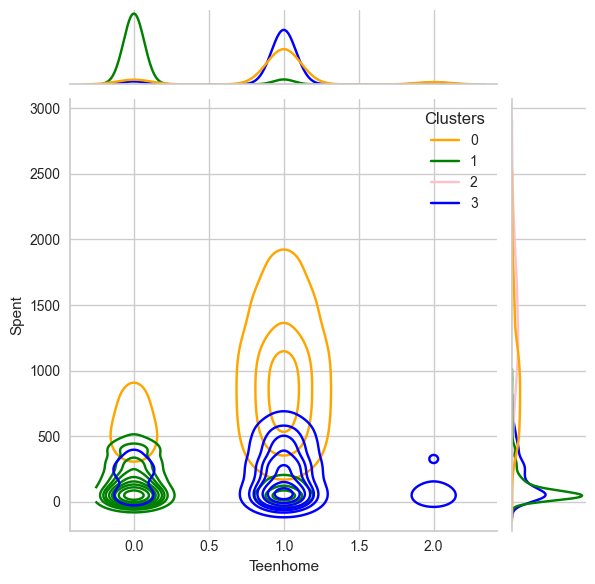

<Figure size 800x550 with 0 Axes>

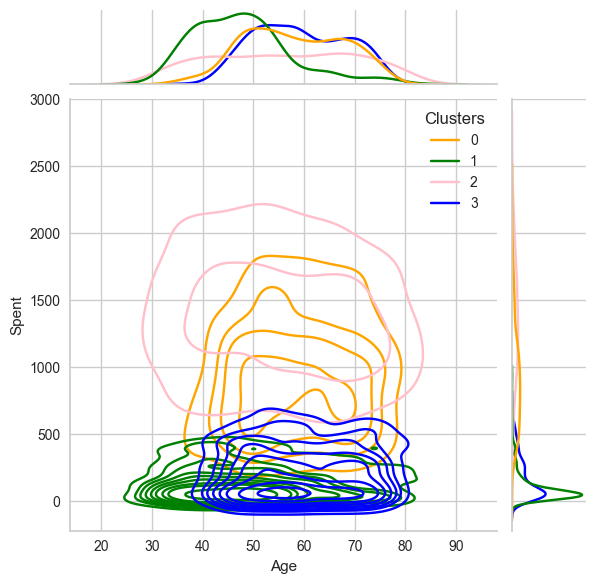

<Figure size 800x550 with 0 Axes>

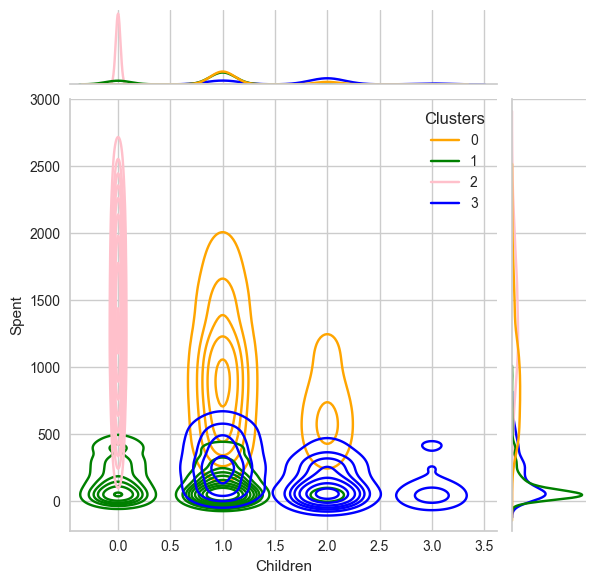

<Figure size 800x550 with 0 Axes>

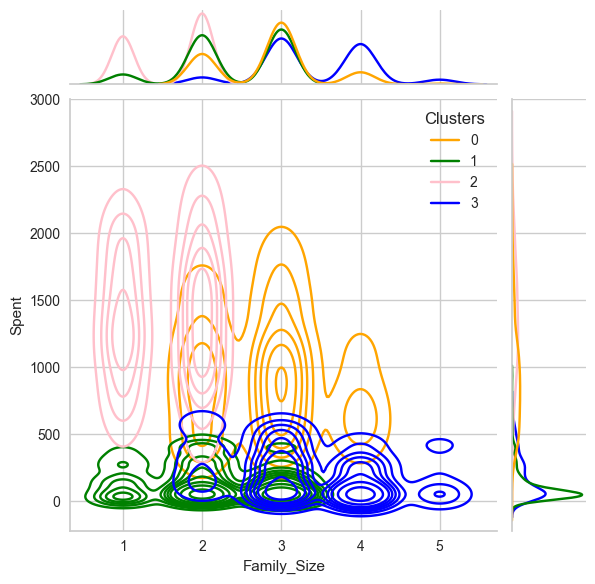

<Figure size 800x550 with 0 Axes>

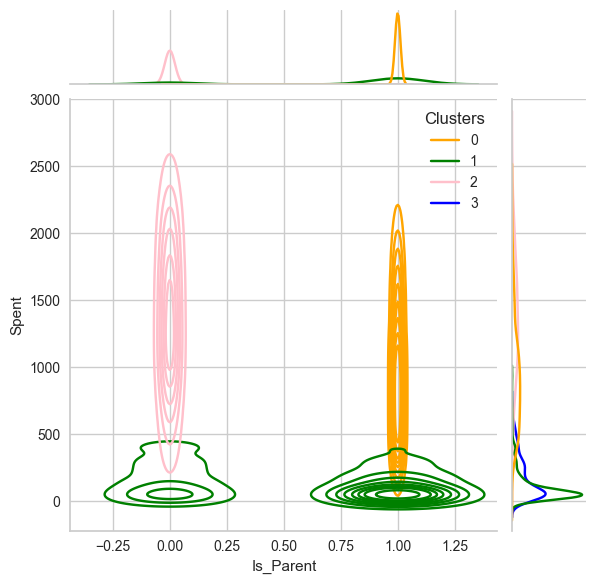

<Figure size 800x550 with 0 Axes>

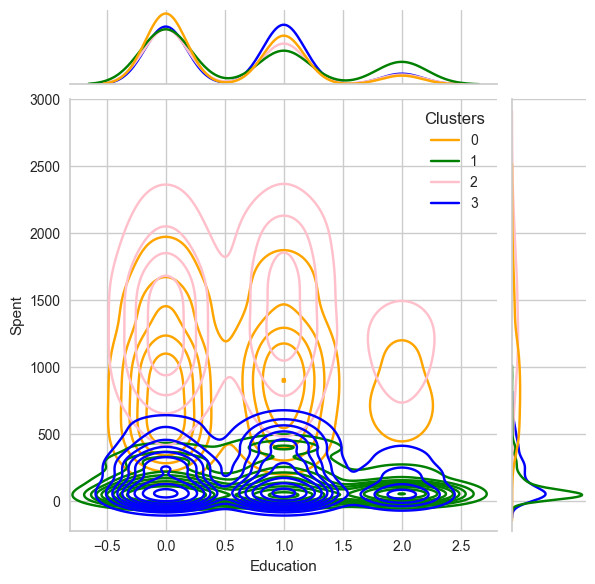

<Figure size 800x550 with 0 Axes>

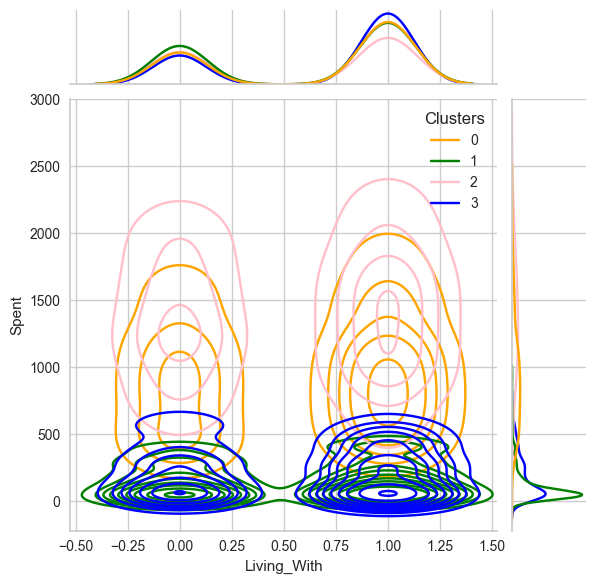

In [ ]:
Personal = [ "Kidhome","Teenhome", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=custom_palette)
    plt.show()

**Cluster Profiling Summary**

**Cluster 0:**
- Most are **parents**.
- Family size ranges from **2 to 4 members**.
- Includes **single parents**.
- Many have **teenagers** at home.
- Relatively **older age group**.

**Cluster 1:**
- Majority are **parents**.
- Families have **up to 3 members**.
- Most have **one child**, typically **not teenagers**.
- Relatively **younger**.

**Cluster 2:**
- **Not parents**.
- Families consist of **2 members at most**.
- Slight majority of **couples**, though some are **single**.
- **All age ranges** are represented.
- A **high-income** group.

**Cluster 3:**
- All are **parents**.
- Family size ranges from **2 to 5 members**.
- Most have **teenagers** at home.
- Relatively **older**.
- A **lower-income** group.
